# Forcing data from external formats

This example uses data from ECMWF ERA5 obtained from [CDS](https://cds.climate.copernicus.eu/#!/home)

A common format for multidimensional data is [NetCDF](https://www.unidata.ucar.edu/software/netcdf/).

An excellent python package for working with NetCDF in Python is [Xarray](http://xarray.pydata.org/en/stable/).

In [ ]:
! pip install netcdf4 xarray

In [4]:
import xarray as xr

ds = xr.open_dataset("data/era5_small.nc")
ds

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 121, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 29.25 29.5 29.75 30.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 40.5 40.25 40.0
  * time       (time) datetime64[ns] 1977-12-01 ... 1977-12-03T18:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-21 06:03:31 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [5]:
ds.t2m

<xarray.DataArray 't2m' (time: 12, latitude: 121, longitude: 121)>
[175692 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 29.25 29.5 29.75 30.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 40.5 40.25 40.0
  * time       (time) datetime64[ns] 1977-12-01 ... 1977-12-03T18:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [9]:
ds0 = ds.isel(time=0)
ds0

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 121)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 29.25 29.5 29.75 30.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 40.5 40.25 40.0
    time       datetime64[ns] 1977-12-01
Data variables:
    u10        (latitude, longitude) float32 ...
    v10        (latitude, longitude) float32 ...
    d2m        (latitude, longitude) float32 ...
    t2m        (latitude, longitude) float32 ...
    msl        (latitude, longitude) float32 ...
    sp         (latitude, longitude) float32 ...
    tcc        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-21 06:03:31 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

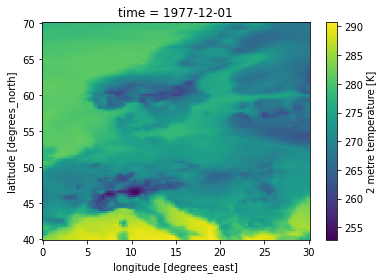

In [11]:
ds0.t2m.plot()

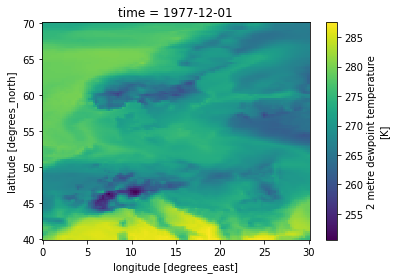

In [12]:
ds0.d2m.plot()

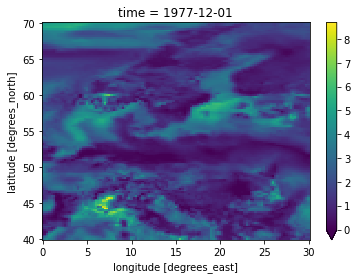

In [21]:
(ds0.t2m - ds0.d2m).plot(vmin=0)

## Pressure

Atmospheric pressure comes in different flavors.

`Surface pressure` is the pressure at ground level, i.e. following the terrain.

In the following plot you can clearly see the decrease in surface pressure with altitude in areas with mountains.

This is *NOT* the variable used by MIKE 21 FM HD.

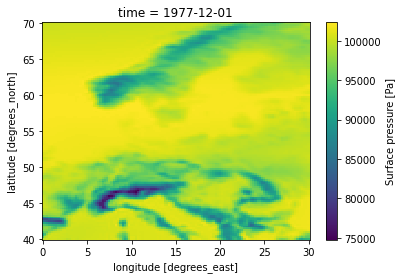

In [25]:
ds0.sp.plot()

MIKE 21 FM HD expects the atmospheric pressure reduced to Mean Sea Level.

In the following plot the pressure field has a much smaller range, since the variation with altitude have been removed.

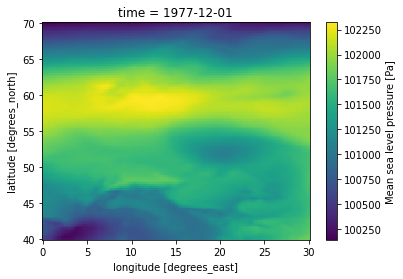

In [23]:
ds0.msl.plot()